# Example
## Preprocessing
We start out by loading an image, in this case the lighthouse
from [*TestImages.jl*](https://testimages.juliaimages.org).

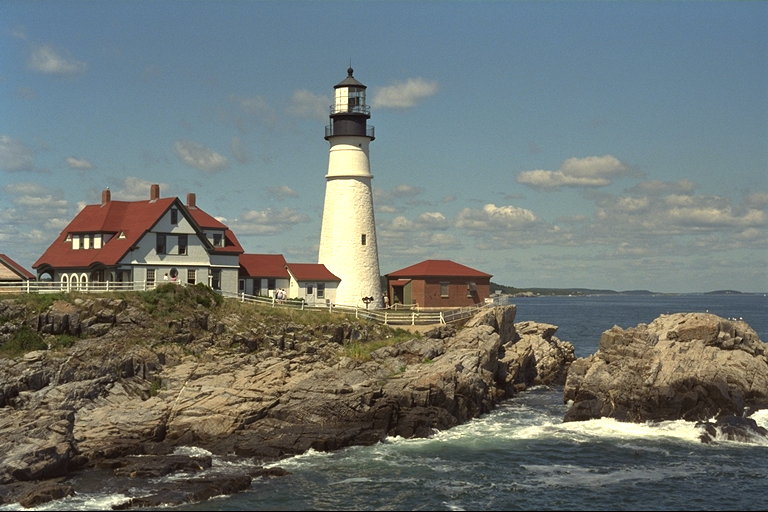

In [1]:
using DitherPunk
using Images
using ImageTransformations
using ImageContrastAdjustment
using TestImages

img = testimage("lighthouse")

Normalizing the image can emphasize the effect of the algorithms.
It is highly recommended to play around with algorithms such as those provided by
[ImageContrastAdjustment.jl](https://juliaimages.org/ImageContrastAdjustment.jl/stable/)

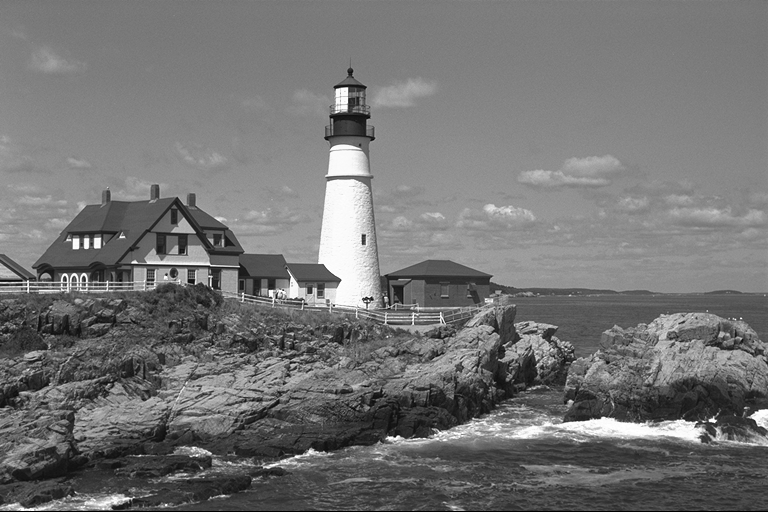

In [2]:
img = Gray.(img) # covert to grayscale
img = adjust_histogram(img, LinearStretching()) # normalize

## Dithering
We can now apply dithering algorithms of our choice,
for example `balanced_centered_point_dithering`.

In [3]:
dither = balanced_centered_point_dithering(img);

## Visualizing the result
The dithering algorithms return binary matrices of type `BitMatrix`.
These can be shown by casting them to grayscale using `Gray.()`.

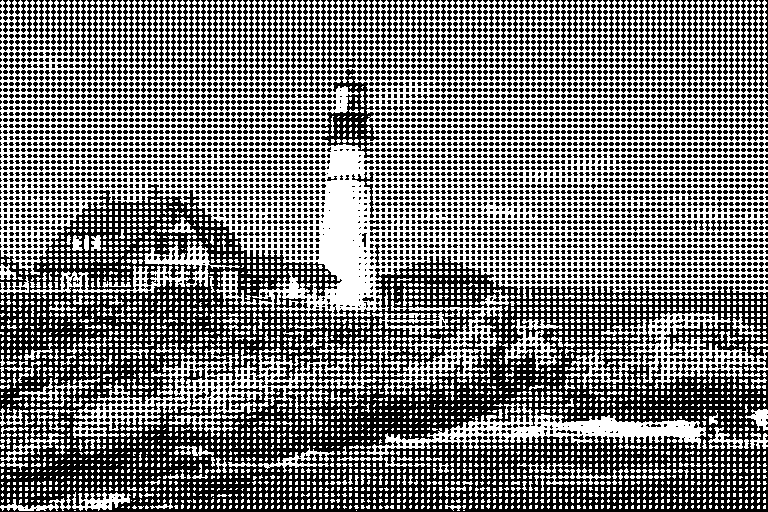

In [4]:
Gray.(dither)

## Color spaces
Dithering in sRGB color space can lead to results that are too bright.
To obtain a dithered image that more closely matches the human perception of brightness,
grayscale images can be converted to a linear color space using `srgb2linear`.
Alternatively, most dithering algorithms accept the boolean keyword argument `to_linear`.

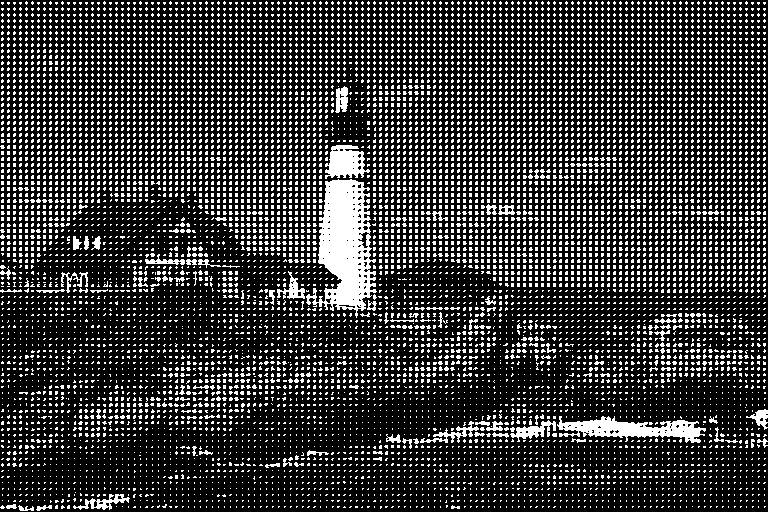

In [5]:
dither = balanced_centered_point_dithering(img; to_linear=true)
Gray.(dither)

## Working with small images
The previous `balanced_centered_point_dithering` algorithm has a large characteristic
pattern. Some algorithms work better on smaller images, for example `bayer_dithering`,
another [ordered dithering algorithm](https://en.wikipedia.org/wiki/Ordered_dithering)
that leads to characteristic cross-hatch patterns.

In [6]:
img = imresize(img; ratio=1 / 5) # downscale
dither = bayer_dithering(img; to_linear=true);

The function `show_dither` casts to `Gray` and provides an additional integer scaling
parameter to print "chunkier" pixels.

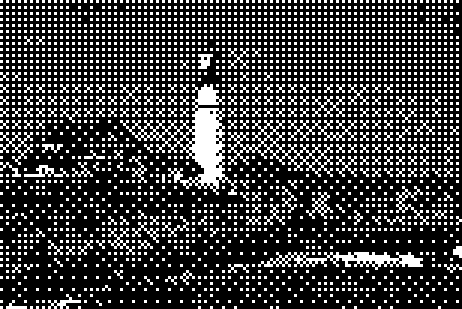

In [7]:
show_dither(dither; scale=3)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*